[Dataset reference](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection)

### Imports

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import xmltodict
from collections import Counter

### Inspect the files

In [30]:
# The files have an annotation and images folder
# Store the image and annotation names in two separate lists

image_list = list()
annot_list = list()

for dir_name, _, file_name in os.walk('./data/'):
    for file in file_name:
        if file[-4:] == '.png':
            image_list.append(file)
            
        elif file[-4:] == '.xml':
            annot_list.append(file)


### EDA

#### Distribution of the classes

In [64]:
# Get a distribution of the dataset

classes = list()

annotation_dir = './data/annotations/'
for image in image_list:
    with open(annotation_dir + image[:-4] + '.xml') as xml_doc:
        doc = xmltodict.parse(xml_doc.read())
    
    tmp = doc['annotation']['object']

    if type(tmp) == list:
        
        for i in range(len(tmp)):
            classes.append(tmp[i]['name'])
    else:
        classes.append(tmp['name'])
        
class_dict = dict(Counter(classes))
print(class_dict)

{'with_mask': 3232, 'mask_weared_incorrect': 123, 'without_mask': 717}


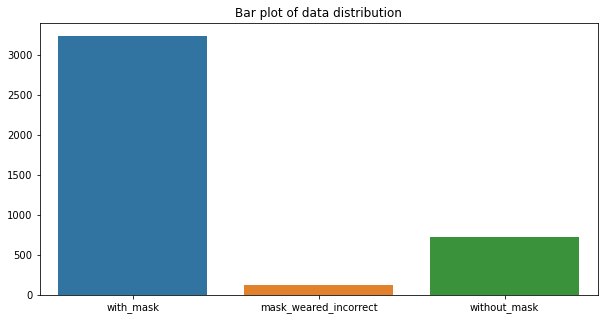

In [65]:
class_labels = Counter(classes).keys()
class_values = Counter(classes).values()

plt.figure(figsize=(10, 5))
plt.title('Bar plot of data distribution')
sns.barplot(x=list(class_labels), y=list(class_values))
plt.show()